<a href="https://colab.research.google.com/github/ParashuramJoshi23/Blog/blob/master/Rootconf'25_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RootConf Workshop Hands-On**

Attempting to load Zachary's Karate Club dataset...
Graph loaded with 34 nodes and 78 edges.

Displaying the Karate Club Graph:


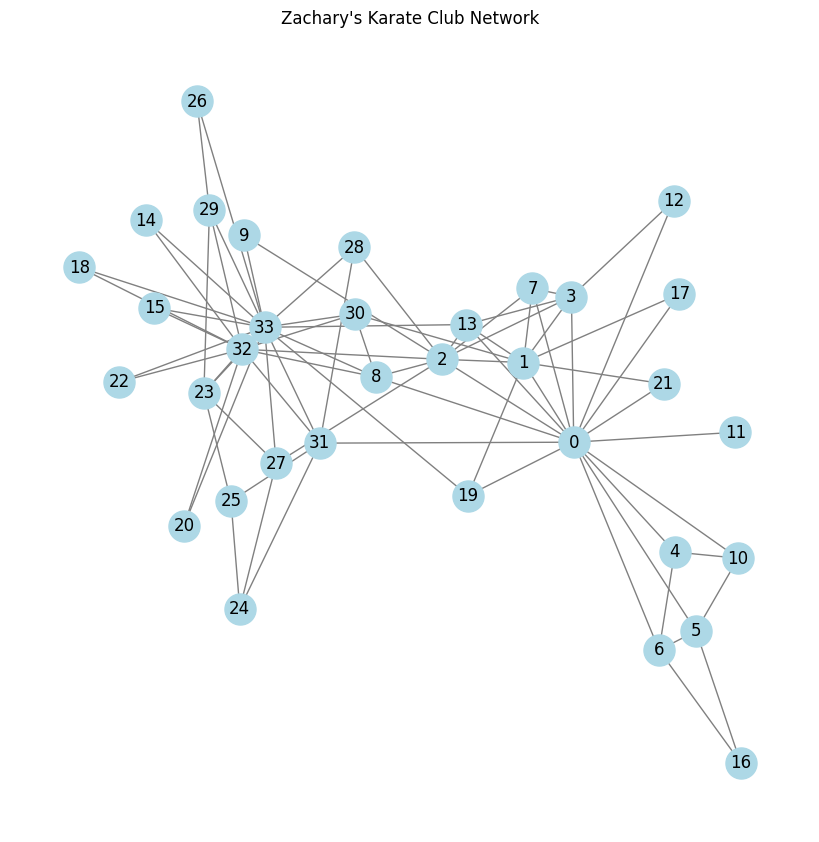

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import requests
import io


def load_karate_club_dataset():
    """
    Loads the Zachary's Karate Club dataset using networkx's built-in function.

    Returns:
        networkx.Graph: The loaded graph object, or None if loading fails.
    """
    print("Attempting to load Zachary's Karate Club dataset...")
    try:
        # networkx includes the dataset
        G = nx.karate_club_graph()
        print(f"Graph loaded with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
        # Convert node labels to strings for consistency with potential external datasets
        G = nx.relabel_nodes(G, {i: str(i) for i in G.nodes()})
        return G
    except Exception as e:
        print(f"An error occurred while loading the graph: {e}")
        return None

# Load the dataset
karate_graph = load_karate_club_dataset()

# Visualize the graph (optional)
if karate_graph:
    print("\nDisplaying the Karate Club Graph:")
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(karate_graph) # Choose a layout
    nx.draw(karate_graph, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
    plt.title("Zachary's Karate Club Network")
    plt.show()
else:
    print("\nCould not load the graph. Exiting.")
    exit() # Exit if the graph wasn't loaded

In [ ]:

# Part 2: Implement Cut Finding Functions (For participants to Fill) ---
import itertools
def find_edge_cut(graph, source, target):
    """
    Finds a set of edges whose removal disconnects source_node from target_node.
    This should aim to find a minimum edge cut.

    Args:
        graph (networkx.Graph): The graph to analyze.
        source_node: The starting node.
        target_node: The target node.

    Returns:
        set: A set of edges (tuples, e.g., {('0', '8'), ('0', '15')})
              representing the edge cut. Return an empty set if no such cut is found
              or the nodes are the same/not in the graph.
    """
    print(f"\nStudent TODO: Implement find_edge_cut between {source} and {target}")
    if source == target or source not in graph or target not in graph:
        return set()

    original_edges = list(graph.edges())
    min_cut = None

    # Try all combinations of k edges starting from 1
    for k in range(1, len(original_edges) + 1):
        for edges_to_remove in itertools.combinations(original_edges, k):
            G = graph.copy()
            G.remove_edges_from(edges_to_remove)
            if not nx.has_path(G, source, target):
                min_cut = set(edges_to_remove)
                return min_cut  # Found minimum edge cut
    return set()








def find_vertex_cut(graph, source_node, target_node):
    """
    Finds a set of vertices whose removal (and their incident edges)
    disconnects source_node from target_node.
    This should aim to find a minimum vertex cut.

    Args:
        graph (networkx.Graph): The graph to analyze.
        source_node: The starting node.
        target_node: The target node.

    Returns:
        set: A set of vertices (e.g., {'0', '33'}) representing the vertex cut.
              Return an empty set if no such cut is found or the nodes are the same/not in the graph.
    """
    print(f"Student TODO: Implement find_vertex_cut between {source_node} and {target_node}")


In [ ]:
find_edge_cut(karate_graph, '0', '33')

{('0', '31'),
 ('0', '8'),
 ('1', '30'),
 ('13', '33'),
 ('19', '33'),
 ('2', '27'),
 ('2', '28'),
 ('2', '32'),
 ('2', '8'),
 ('9', '33')}

In [ ]:
import networkx as nx

def find_edge_cut_builtin(graph, source_node, target_node):
    """
    Finds a set of edges whose removal disconnects source_node from target_node.
    This should aim to find a minimum edge cut.
    """
    if source_node == target_node or source_node not in graph or target_node not in graph:
        return set()

    try:
        edge_cut = nx.minimum_edge_cut(graph, s=source_node, t=target_node)
        return edge_cut
    except nx.NetworkXError:
        return set()


In [ ]:
def find_vertex_cut_builtin(graph, source_node, target_node):
    """
    Finds a set of vertices whose removal (and their incident edges)
    disconnects source_node from target_node.
    """
    if source_node == target_node or source_node not in graph or target_node not in graph:
        return set()

    try:
        vertex_cut = nx.minimum_node_cut(graph, s=source_node, t=target_node)
        return vertex_cut
    except nx.NetworkXError:
        return set()


In [ ]:

#Part 3: Evaluate the Cut

def evaluate_cut(original_graph, cut_set, cut_type, source_node=None, target_node=None):
    """
    Evaluates if the given cut set successfully disconnects the graph,
    specifically between source_node and target_node if provided.

    Args:
        original_graph (networkx.Graph): The original graph before cutting.
        cut_set (set): The set of edges or vertices identified as the cut.
        cut_type (str): 'edge' or 'vertex' indicating the type of cut.
        source_node: The source node (optional, for s-t cuts).
        target_node: The target node (optional, for s-t cuts).

    Returns:
        tuple: (is_successful, size_of_cut, is_minimum)
               is_successful (bool): True if the cut disconnects the specified nodes (or the graph if no nodes specified).
               size_of_cut (int): The number of elements in the cut set.
               is_minimum (bool): True if the cut is a minimum cut between the specified nodes (uses networkx's internal calculation for comparison).
    """
    if not original_graph:
        print("Evaluation failed: Original graph is None.")
        return False, 0, False

    graph_after_cut = original_graph.copy()
    successful_cut = False
    is_minimum = False
    size_of_cut = len(cut_set)

    try:
        if cut_type == 'edge':
            print(f"\nEvaluating edge cut of size {size_of_cut}...")
            graph_after_cut.remove_edges_from(cut_set)

            if source_node is not None and target_node is not None:

                 successful_cut = not nx.has_path(graph_after_cut, source_node, target_node)


                 try:
                     min_cut_size = len(nx.minimum_edge_cut(original_graph, source_node, target_node))
                     is_minimum = (size_of_cut == min_cut_size)
                 except (nx.NetworkXNoPath, nx.NetworkXPointlessConcept):
                      is_minimum = False # Cannot meaningfully compare if min cut doesn't exist

            else:
                # Check if the graph is disconnected
                successful_cut = not nx.is_connected(graph_after_cut)

                is_minimum = False # Not checking for overall minimum cut in this basic evaluation

        elif cut_type == 'vertex':
            print(f"\nEvaluating vertex cut of size {size_of_cut}...")
            graph_after_cut.remove_nodes_from(cut_set)

            if source_node is not None and target_node is not None:

                 if source_node not in cut_set and target_node not in cut_set:
                     successful_cut = not nx.has_path(graph_after_cut, source_node, target_node)
                 else:
                      # If source or target is removed, they are trivially disconnected
                      successful_cut = True

                 # Check if it's a minimum cut (comparing to networkx's result)
                 try:
                     min_cut_size = len(nx.minimum_node_cut(original_graph, source_node, target_node))
                     is_minimum = (size_of_cut == min_cut_size)
                 except (nx.NetworkXNoPath, nx.NetworkXPointlessConcept):
                     is_minimum = False # Cannot meaningfully compare

            else:

                 if graph_after_cut.number_of_nodes() > 1:
                     successful_cut = not nx.is_connected(graph_after_cut)
                 else:
                     successful_cut = True
                 is_minimum = False


        else:
            print("Invalid cut_type. Use 'edge' or 'vertex'.")
            return False, size_of_cut, False

    except nx.NetworkXError as e:
        print(f"Error during cut evaluation: {e}")
        return False, size_of_cut, False

    print(f"Cut successful in separating specified nodes/graph: {successful_cut}")
    if source_node is not None and target_node is not None:
         print(f"Is this a minimum cut between {source_node} and {target_node}? {is_minimum}")


    return successful_cut, size_of_cut, is_minimum


In [ ]:
# --- Part 4: Example Usage and Student Task ---

if karate_graph:
    # --- Student Task: Implement find_edge_cut and find_vertex_cut ---

    # Choose two nodes to find cuts between. In the karate club graph,
    # nodes '0' and '33' are the leaders of the two factions that formed.
    # Finding cuts between them is a meaningful task.
    source = '0'
    target = '33'

    # Call the student's edge cut function
    student_edge_cut = find_edge_cut(karate_graph.copy(), source, target) # Pass a copy to be safe

    # Evaluate the student's edge cut
    print("\n--- Edge Cut Evaluation ---")
    success_edge, size_edge, is_min_edge = evaluate_cut(karate_graph, student_edge_cut, 'edge', source_node=source, target_node=target)
    print(f"Student's edge cut: {student_edge_cut}")
    print(f"Evaluation Result: Successful = {success_edge}, Size = {size_edge}, Is Minimum = {is_min_edge}")


    # Call the student's vertex cut function
    # Need a fresh copy for the vertex cut
    student_vertex_cut = find_vertex_cut(karate_graph.copy(), source, target) # Pass a copy

    # Evaluate the student's vertex cut
    print("\n--- Vertex Cut Evaluation ---")
    success_vertex, size_vertex, is_min_vertex = evaluate_cut(karate_graph, student_vertex_cut, 'vertex', source_node=source, target_node=target)
    print(f"Student's vertex cut: {student_vertex_cut}")
    print(f"Evaluation Result: Successful = {success_vertex}, Size = {size_vertex}, Is Minimum = {is_min_vertex}")


--- Edge Cut Evaluation ---

Evaluating edge cut of size 10...
Cut successful in separating specified nodes/graph: True
Is this a minimum cut between 0 and 33? True
Student's edge cut: {('2', '32'), ('2', '27'), ('13', '33'), ('2', '8'), ('9', '33'), ('0', '8'), ('0', '31'), ('1', '30'), ('19', '33'), ('2', '28')}
Evaluation Result: Successful = True, Size = 10, Is Minimum = True

--- Vertex Cut Evaluation ---

Evaluating vertex cut of size 6...
Cut successful in separating specified nodes/graph: True
Is this a minimum cut between 0 and 33? True
Student's vertex cut: {'8', '13', '31', '2', '30', '19'}
Evaluation Result: Successful = True, Size = 6, Is Minimum = True


BFS Map reduce

In [ ]:
import networkx as nx

# Load Zachary's Karate Club graph
G = nx.karate_club_graph()

# Convert to adjacency list
graph = {str(node): [str(neigh) for neigh in G.neighbors(node)] for node in G.nodes()}

#'GRAY': node has been discovered but not fully explored

#'WHITE': undiscovered

#'BLACK': fully explored

#. BLACK > GRAY > WHITE.

#Mapper phase: emits node records and updates neighbors of GRAY nodes.

#Reducer phase: groups all records for each node and merges them.

# Initialize node data for BFS starting from node '0'

start_node = '0'
node_data = {}
for node in graph:
    if node == start_node:
        node_data[node] = {'distance': 0, 'status': 'GRAY', 'neighbors': graph[node], 'prev': None}
    else:
        node_data[node] = {'distance': float('inf'), 'status': 'WHITE', 'neighbors': graph[node], 'prev': None}

iteration = 0
total_io_operations = 0

while True:
    mapper_output = []

    # Mapper
    for node, data in node_data.items():
        mapper_output.append((node, data))
        if data['status'] == 'GRAY':
            for neighbor in data['neighbors']:
                emitted_record = {
                    'distance': data['distance'] + 1,
                    'status': 'GRAY',
                    'neighbors': [],
                    'prev': node
                }
                mapper_output.append((neighbor, emitted_record))
            data['status'] = 'BLACK'
    print(mapper_output)

    total_io_operations += len(mapper_output)

    # Shuffle + Reducer
    grouped = {}
    for key, value in mapper_output:
        grouped.setdefault(key, []).append(value)

    new_node_data = {}
    changes = 0

    for node, records in grouped.items():
        min_distance = float('inf')
        final_status = 'WHITE'
        neighbors = []
        predecessor = None

        for record in records:
            if record['distance'] < min_distance:
                min_distance = record['distance']
                predecessor = record['prev']
            if record['status'] == 'BLACK':
                final_status = 'BLACK'
            elif record['status'] == 'GRAY' and final_status != 'BLACK':
                final_status = 'GRAY'
            if record['neighbors']:
                neighbors = record['neighbors']

        old_data = node_data.get(node, {})
        if min_distance != old_data.get('distance', float('inf')) or final_status != old_data.get('status', 'WHITE'):
            changes += 1

        new_node_data[node] = {
            'distance': min_distance,
            'status': final_status,
            'neighbors': neighbors,
            'prev': predecessor if predecessor is not None else old_data.get('prev')
        }

    node_data = new_node_data
    iteration += 1

    if changes == 0:
        break

# Prepare focus numbers and shortest paths
focus_numbers = {
    "Total Iterations": iteration,
    "Total I/O Operations": total_io_operations,
    "Final GRAY Nodes": sum(1 for v in node_data.values() if v['status'] == 'GRAY'),
    "Final BLACK Nodes": sum(1 for v in node_data.values() if v['status'] == 'BLACK')
}

shortest_paths = {}
for node in sorted(node_data.keys(), key=lambda x: int(x)):
    path = []
    curr = node
    while curr:
        path.append(curr)
        curr = node_data[curr]['prev']
    path.reverse()
    if node_data[node]['distance'] < float('inf'):
        shortest_paths[node] = {'distance': node_data[node]['distance'], 'path': path}
    else:
        shortest_paths[node] = None

focus_numbers, shortest_paths


[('0', {'distance': 0, 'status': 'BLACK', 'neighbors': ['1', '2', '3', '4', '5', '6', '7', '8', '10', '11', '12', '13', '17', '19', '21', '31'], 'prev': None}), ('1', {'distance': 1, 'status': 'GRAY', 'neighbors': [], 'prev': '0'}), ('2', {'distance': 1, 'status': 'GRAY', 'neighbors': [], 'prev': '0'}), ('3', {'distance': 1, 'status': 'GRAY', 'neighbors': [], 'prev': '0'}), ('4', {'distance': 1, 'status': 'GRAY', 'neighbors': [], 'prev': '0'}), ('5', {'distance': 1, 'status': 'GRAY', 'neighbors': [], 'prev': '0'}), ('6', {'distance': 1, 'status': 'GRAY', 'neighbors': [], 'prev': '0'}), ('7', {'distance': 1, 'status': 'GRAY', 'neighbors': [], 'prev': '0'}), ('8', {'distance': 1, 'status': 'GRAY', 'neighbors': [], 'prev': '0'}), ('10', {'distance': 1, 'status': 'GRAY', 'neighbors': [], 'prev': '0'}), ('11', {'distance': 1, 'status': 'GRAY', 'neighbors': [], 'prev': '0'}), ('12', {'distance': 1, 'status': 'GRAY', 'neighbors': [], 'prev': '0'}), ('13', {'distance': 1, 'status': 'GRAY', 'ne

({'Total Iterations': 4,
  'Total I/O Operations': 292,
  'Final GRAY Nodes': 0,
  'Final BLACK Nodes': 34},
 {'0': {'distance': 0, 'path': ['0']},
  '1': {'distance': 1, 'path': ['0', '1']},
  '2': {'distance': 1, 'path': ['0', '2']},
  '3': {'distance': 1, 'path': ['0', '3']},
  '4': {'distance': 1, 'path': ['0', '4']},
  '5': {'distance': 1, 'path': ['0', '5']},
  '6': {'distance': 1, 'path': ['0', '6']},
  '7': {'distance': 1, 'path': ['0', '7']},
  '8': {'distance': 1, 'path': ['0', '8']},
  '9': {'distance': 2, 'path': ['0', '2', '9']},
  '10': {'distance': 1, 'path': ['0', '10']},
  '11': {'distance': 1, 'path': ['0', '11']},
  '12': {'distance': 1, 'path': ['0', '12']},
  '13': {'distance': 1, 'path': ['0', '13']},
  '14': {'distance': 3, 'path': ['0', '2', '32', '14']},
  '15': {'distance': 3, 'path': ['0', '2', '32', '15']},
  '16': {'distance': 2, 'path': ['0', '5', '16']},
  '17': {'distance': 1, 'path': ['0', '17']},
  '18': {'distance': 3, 'path': ['0', '2', '32', '18']},

In [ ]:
## Scala code for pregel bfs

In [ ]:
    val initialGraph = graph.mapVertices(id, _) => if (id == root) 0.0 else Double.PositiveInfinity)

In [ ]:
    triplet => {
        if (triplet.srcAttr != Double.PositiveInfinity) {
            Iterator((triplet.dstId, triplet.srcAttr+1))
        } else {
        Iterator.empty
        }
    },

Preserving The Minimum Distance At Each Step
Pregel's vertex program will preserve the minimum distance between the one it receives and what it has:

(id, attr, msg) => math.min(attr, msg)

Its reduce operation preserves the minimum distance if multiple messages are received for the same vertex:

(a,b) => math.min(a,b)



In [ ]:
    // Initialize each node with a distance of infinity, unless it's our starting point
    val initialGraph = graph.mapVertices((id, _) => if (id == root) 0.0 else Double.PositiveInfinity)

    // Now the Pregel magic
    val bfs = initialGraph.pregel(Double.PositiveInfinity, 10)(
        // Our "vertex program" preserves the shortest distance
        // between an inbound message and its current value.
        // It receives the vertex ID we are operating on,
        // the attribute already stored with the vertex, and
        // the inbound message from this iteration.
        (id, attr, msg) => math.min(attr, msg),

        // Our "send message" function propagates out to all neighbors
        // with the distance incremented by one.
        triplet => {
            if (triplet.srcAttr != Double.PositiveInfinity) {
                Iterator((triplet.dstId, triplet.srcAttr+1))
            } else {
            Iterator.empty
            }
        },

        // The "reduce" operation preserves the minimum
        // of messages received by a vertex if multiple
        // messages are received by one vertex
        (a,b) => math.min(a,b) )
